In [243]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval

experiment_name = "test"
show_fqi = True; show_lspi = True; show_pbo_linear = False; show_pbo_custom_linear = True; 
show_pbo_deep = True; show_pbo_optimal = True
max_bellman_iterations = 3
max_bellman_iterations_validation = max_bellman_iterations + 6
seeds = range(1, 21)

p = json.load(open(f"figures/{experiment_name}/parameters.json"))

n_seeds = len(seeds)
ticks_freq = 2
n_actions = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extract data

In [244]:
if show_fqi:
    fqi_w = np.zeros((len(seeds), max_bellman_iterations + 1, 3))
    fqi_v = np.zeros((len(seeds), max_bellman_iterations + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        fqi_w[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_W_{seed}.npy")
        fqi_v[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_V_{seed}.npy")

if show_lspi:
    lspi_w = np.zeros((len(seeds), max_bellman_iterations + 1, 3))
    lspi_v = np.zeros((len(seeds), max_bellman_iterations + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        lspi_w[idx_seed] = np.load(f"figures/{experiment_name}/LSPI/{max_bellman_iterations}_W_{seed}.npy")
        lspi_v[idx_seed] = np.load(f"figures/{experiment_name}/LSPI/{max_bellman_iterations}_V_{seed}.npy")

optimal_w = np.load(f"figures/data/optimal/W.npy")
optimal_v = np.load(f"figures/data/optimal/V.npy")

if show_pbo_linear:
    pbo_linear_w = np.zeros((len(seeds), max_bellman_iterations_validation + 2, 3))
    pbo_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 2))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        pbo_linear_w[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_W_{seed}.npy")
        pbo_linear_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_custom_linear:
    pbo_custom_linear_w = np.zeros((len(seeds), max_bellman_iterations_validation + 1, 3))
    pbo_custom_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        pbo_custom_linear_w[idx_seed] = np.load(f"figures/{experiment_name}/PBO_custom_linear/{max_bellman_iterations}_W_{seed}.npy")
        pbo_custom_linear_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_custom_linear/{max_bellman_iterations}_V_{seed}.npy")

if show_pbo_deep:
    pbo_deep_w = np.zeros((len(seeds), max_bellman_iterations_validation + 1, 3))
    pbo_deep_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1))

    for idx_seed, seed in enumerate(range(1, len(seeds) + 1)):
        pbo_deep_w[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_W_{seed}.npy")
        pbo_deep_v[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_V_{seed}.npy")
        
if show_pbo_optimal:
    pbo_optimal_w = np.load(f"figures/{experiment_name}/PBO_optimal/{max_bellman_iterations}_W.npy")
    pbo_optimal_v = np.load(f"figures/{experiment_name}/PBO_optimal/{max_bellman_iterations}_V.npy")

### Distances with the optimal weights

In [245]:
if show_fqi:
    fqi_w_mean = np.sqrt(np.mean(np.square(fqi_w - optimal_w), axis=2)).mean(axis=0)
    fqi_w_std = np.sqrt(np.mean(np.square(fqi_w - optimal_w), axis=2)).std(axis=0)
    fqi_w_confidence_interval = confidence_interval(fqi_w_mean, fqi_w_std, len(seeds))

if show_lspi:
    lspi_w_mean = np.sqrt(np.mean(np.square(lspi_w - optimal_w), axis=2)).mean(axis=0)
    lspi_w_std = np.sqrt(np.mean(np.square(lspi_w - optimal_w), axis=2)).std(axis=0)
    lspi_w_confidence_interval = confidence_interval(lspi_w_mean, lspi_w_std, len(seeds))

if show_pbo_linear:
    pbo_linear_w_mean = np.sqrt(np.mean(np.square(pbo_linear_w - optimal_w), axis=2)).mean(axis=0)
    pbo_linear_w_std = np.sqrt(np.mean(np.square(pbo_linear_w - optimal_w), axis=2)).std(axis=0)
    pbo_linear_w_confidence_interval = confidence_interval(pbo_linear_w_mean, pbo_linear_w_std, len(seeds))

if show_pbo_custom_linear:
    pbo_custom_linear_w_mean = np.sqrt(np.mean(np.square(pbo_custom_linear_w - optimal_w), axis=2)).mean(axis=0)
    pbo_custom_linear_w_std = np.sqrt(np.mean(np.square(pbo_custom_linear_w - optimal_w), axis=2)).std(axis=0)
    pbo_custom_linear_w_confidence_interval = confidence_interval(pbo_custom_linear_w_mean, pbo_custom_linear_w_std, len(seeds))

if show_pbo_deep:
    pbo_deep_w_mean = np.sqrt(np.mean(np.square(pbo_deep_w - optimal_w), axis=2)).mean(axis=0)
    pbo_deep_w_std = np.sqrt(np.mean(np.square(pbo_deep_w - optimal_w), axis=2)).std(axis=0)
    pbo_deep_w_confidence_interval = confidence_interval(pbo_deep_w_mean, pbo_deep_w_std, len(seeds))

if show_pbo_optimal:
    pbo_optimal_w_mean = np.sqrt(np.mean(np.square(pbo_optimal_w - optimal_w), axis=1))

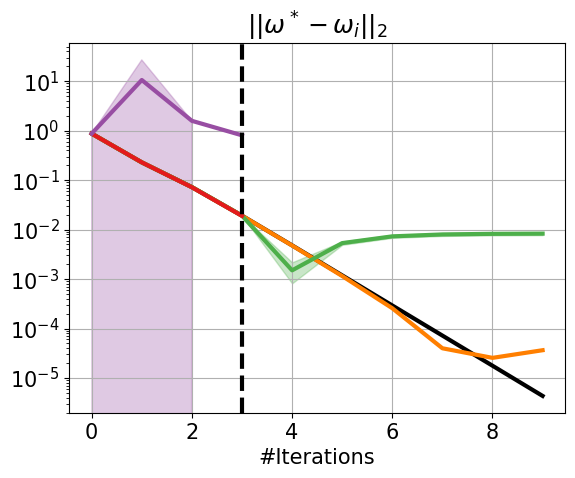

In [246]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_optimal:
    plt.plot(iterations_validation, pbo_optimal_w_mean, label="Optimal PBO", color="black")

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_w_mean[:-1], label="linear PBO", color="blue")
    plt.fill_between(iterations_validation, pbo_linear_w_confidence_interval[0, :-1], pbo_linear_w_confidence_interval[1, :-1], color="blue", alpha=0.3)

    plt.hlines(pbo_linear_w_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point")
    plt.fill_between(iterations_validation, pbo_linear_w_confidence_interval[0, -1], pbo_linear_w_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_custom_linear:
    plt.plot(iterations_validation, pbo_custom_linear_w_mean, label="ProFQI$_{LQR}$ (ours)", color=colors["orange"])
    plt.fill_between(iterations_validation, pbo_custom_linear_w_confidence_interval[0], pbo_custom_linear_w_confidence_interval[1], color=colors["orange"], alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_w_mean, label="ProFQI (ours)", color=colors["ProFQI"])
    plt.fill_between(iterations_validation, pbo_deep_w_confidence_interval[0], pbo_deep_w_confidence_interval[1], color=colors["ProFQI"], alpha=0.3)

if show_fqi:
    plt.plot(iterations, fqi_w_mean, label="FQI", color=colors["FQI"])
    plt.fill_between(iterations, fqi_w_confidence_interval[0], fqi_w_confidence_interval[1], color=colors["FQI"], alpha=0.3)

if show_lspi:
    plt.plot(iterations, lspi_w_mean, label="LSPI", color=colors["LSPI"])
    plt.fill_between(iterations, lspi_w_confidence_interval[0], lspi_w_confidence_interval[1], color=colors["LSPI"], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.yscale("log")
plt.title("$|| \omega^* - \omega_i ||_2$")
# plt.legend().set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/W_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Distance to optimal value function

In [247]:
if show_fqi:
    fqi_v_mean = np.abs(fqi_v - optimal_v).mean(axis=0)
    fqi_v_std = np.abs(fqi_v - optimal_v).std(axis=0)
    fqi_v_confidence_interval = confidence_interval(fqi_v_mean, fqi_v_std, len(seeds))

if show_lspi:
    lspi_v_mean = np.abs(lspi_v - optimal_v).mean(axis=0)
    lspi_v_std = np.abs(lspi_v - optimal_v).std(axis=0)
    lspi_v_confidence_interval = confidence_interval(lspi_v_mean, lspi_v_std, len(seeds))

if show_pbo_linear:
    pbo_linear_v_mean = np.abs(pbo_linear_v - optimal_v).mean(axis=0)
    pbo_linear_v_std = np.abs(pbo_linear_v - optimal_v).std(axis=0)
    pbo_linear_v_confidence_interval = confidence_interval(pbo_linear_v_mean, pbo_linear_v_std, len(seeds))

if show_pbo_custom_linear:
    pbo_custom_linear_v_mean = np.abs(pbo_custom_linear_v - optimal_v).mean(axis=0)
    pbo_custom_linear_v_std = np.abs(pbo_custom_linear_v - optimal_v).std(axis=0)
    pbo_custom_linear_v_confidence_interval = confidence_interval(pbo_custom_linear_v_mean, pbo_custom_linear_v_std, len(seeds))

if show_pbo_deep:
    pbo_deep_v_mean = np.abs(pbo_deep_v - optimal_v).mean(axis=0)
    pbo_deep_v_std = np.abs(pbo_deep_v - optimal_v).std(axis=0)
    pbo_deep_v_confidence_interval = confidence_interval(pbo_deep_v_mean, pbo_deep_v_std, len(seeds))

if show_pbo_optimal:
    pbo_optimal_v_mean = np.abs(pbo_optimal_v - optimal_v)

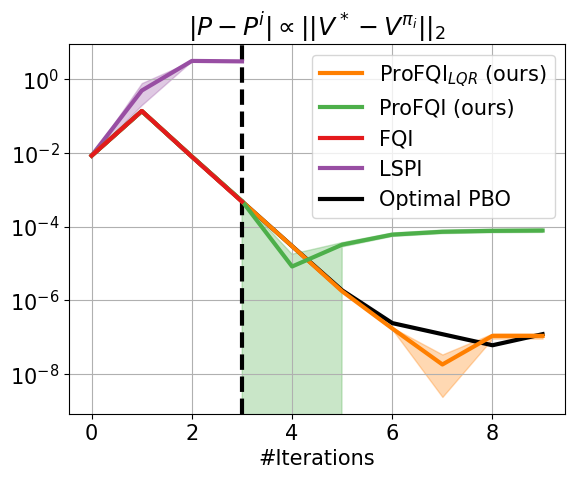

In [248]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_v_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, :-1], pbo_linear_v_confidence_interval[1, :-1], color="blue", alpha=0.3)

    plt.hlines(pbo_linear_v_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
    plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, -1], pbo_linear_v_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_custom_linear:
    plt.plot(iterations_validation, pbo_custom_linear_v_mean, label="ProFQI$_{LQR}$ (ours)", color=colors["orange"], zorder=8)
    plt.fill_between(iterations_validation, pbo_custom_linear_v_confidence_interval[0], pbo_custom_linear_v_confidence_interval[1], color=colors["orange"], alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_v_mean, label="ProFQI (ours)", color=colors["ProFQI"], zorder=8)
    plt.fill_between(iterations_validation, pbo_deep_v_confidence_interval[0], pbo_deep_v_confidence_interval[1], color=colors["ProFQI"], alpha=0.3)

if show_fqi:
    plt.plot(iterations, fqi_v_mean, label="FQI", color=colors["FQI"], zorder=9)
    plt.fill_between(iterations, fqi_v_confidence_interval[0], fqi_v_confidence_interval[1], color=colors["FQI"], alpha=0.3)

if show_lspi:
    plt.plot(iterations, lspi_v_mean, label="LSPI", color=colors["LSPI"], zorder=5)
    plt.fill_between(iterations, lspi_v_confidence_interval[0], lspi_v_confidence_interval[1], color=colors["LSPI"], alpha=0.3)

if show_pbo_optimal:
    plt.plot(iterations_validation, pbo_optimal_v_mean, label="Optimal PBO", color="black", zorder=4)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.yscale("log")
plt.title("$|P - P^i| \propto || V^* - V^{\pi_i} ||_2$")
plt.legend().set_zorder(10)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/V_{max_bellman_iterations}.pdf", bbox_inches='tight')

## Visualise

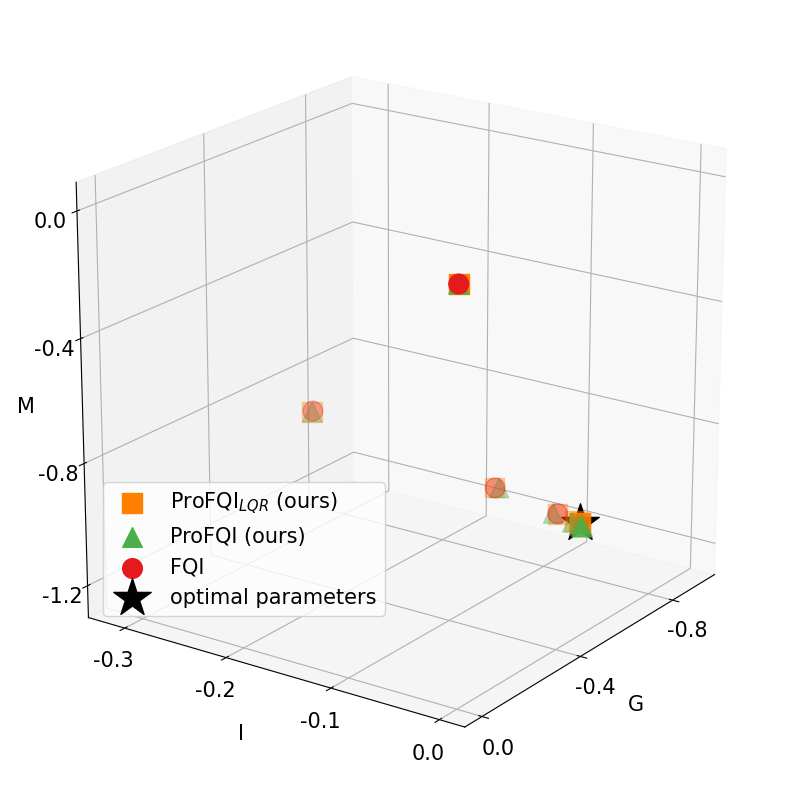

In [249]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

if show_pbo_linear:
    ax.scatter(pbo_linear_w[0, :, 0], pbo_linear_w[0, :, 1], pbo_linear_w[0, :, 2], label='linear PBO', color="blue", s=200, zorder=4)
if show_pbo_custom_linear:
    ax.scatter(pbo_custom_linear_w[0, :, 0], pbo_custom_linear_w[0, :, 1], pbo_custom_linear_w[0, :, 2], label="ProFQI$_{LQR}$ (ours)", color=colors["orange"], s=200, zorder=5, marker="s")
if show_pbo_deep:
    ax.scatter(pbo_deep_w[0, :, 0], pbo_deep_w[0, :, 1], pbo_deep_w[0, :, 2], label="ProFQI (ours)", color=colors["ProFQI"], s=200, zorder=5, marker="^")
if show_fqi:
    ax.scatter(fqi_w[0, :, 0], fqi_w[0, :, 1], fqi_w[0, :, 2], label='FQI', color=colors["FQI"], s=200, zorder=2)
# ax.scatter(lspi_w[0, :, 0], lspi_w[0, :, 1], lspi_w[0, :, 2], label='LSPI', color="purple", s=np.linspace(600, 60, max_bellman_iterations+ 1), zorder=3)
# ax.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO', color="black", s=np.linspace(100, 10, max_bellman_iterations_validation + 1), zorder=1)
ax.scatter(optimal_w[0], optimal_w[1], optimal_w[2], label='optimal parameters', color="black", marker="*", s=800, zorder=0)

plt.legend(bbox_to_anchor=(0.5, 0.4))
ax.view_init(20, 35)
ax.set_xlabel("G", labelpad=10)
ax.set_xticks(np.linspace(-0.8, 0, 3), labels=np.around(np.linspace(-0.8, 0, 3), 1))
ax.set_ylabel("I", labelpad=10)
ax.set_yticks(np.linspace(-0.3, 0, 4), labels=np.around(np.linspace(-0.3, 0, 4), 1))
ax.set_zlabel("M")
ax.set_zticks(np.linspace(-1.2, 0, 4), labels=np.around(np.linspace(-1.2, 0, 4), 1))
ax.set_box_aspect([1,1,1])
_ = plt.savefig(f"figures/{experiment_name}/visu_3D_{max_bellman_iterations}.pdf", bbox_inches='tight')

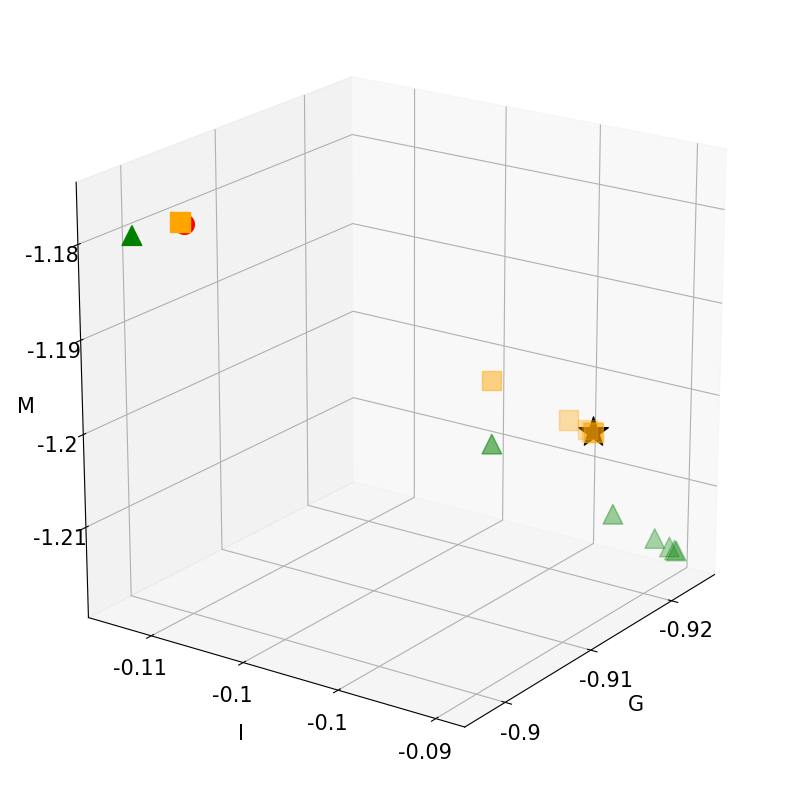

In [250]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

start_iteration = max_bellman_iterations

if show_pbo_linear:
    ax.scatter(pbo_linear_w[0, start_iteration:, 0], pbo_linear_w[0, start_iteration:, 1], pbo_linear_w[0, start_iteration:, 2], label='linear PBO', color="blue", s=200, zorder=4)
if show_pbo_custom_linear:
    ax.scatter(pbo_custom_linear_w[0, start_iteration:, 0], pbo_custom_linear_w[0, start_iteration:, 1], pbo_custom_linear_w[0, start_iteration:, 2], label='PQI with LQR prior', color="orange", s=200, zorder=5, marker="s")
if show_pbo_deep:
    ax.scatter(pbo_deep_w[0, start_iteration:, 0], pbo_deep_w[0, start_iteration:, 1], pbo_deep_w[0, start_iteration:, 2], label='PQI', color="green", s=200, zorder=5, marker="^")
if show_fqi:
    ax.scatter(fqi_w[0, start_iteration:, 0], fqi_w[0, start_iteration:, 1], fqi_w[0, start_iteration:, 2], label='FQI', color="red", s=200, zorder=2)
# ax.scatter(lspi_w[0, start_iteration:, 0], lspi_w[0, start_iteration:, 1], lspi_w[0, start_iteration:, 2], label='LSPI', color="purple", s=np.linspace(600, 60, max_bellman_iterations+ 1), zorder=3)
# ax.scatter(pbo_optimal_w[:, 0], pbo_optimal_w[:, 1], pbo_optimal_w[:, 2], label='PBO', color="black", s=np.linspace(100, 10, max_bellman_iterations_validation + 1), zorder=1)
ax.scatter(optimal_w[0], optimal_w[1], optimal_w[2], label='optimal parameters', color="black", marker="*", s=500, zorder=0)

# plt.legend(bbox_to_anchor=(0.37, 0.6))
ax.view_init(20, 35)
ax.set_xlabel("G", labelpad=10)
ax.set_xticks(np.linspace(-0.92, -0.90, 3), labels=np.around(np.linspace(-0.92, -0.90, 3), 2))
ax.set_ylabel("I", labelpad=10)
ax.set_yticks(np.linspace(-0.11, -0.09, 4), labels=np.around(np.linspace(-0.11, -0.09, 4), 2))
ax.set_zlabel("M")
ax.set_zticks(np.linspace(-1.21, -1.18, 4), labels=np.around(np.linspace(-1.21, -1.18, 4), 2))
ax.set_box_aspect([1, 1, 1])
_ = plt.savefig(f"figures/{experiment_name}/visu_3D_zoom_{max_bellman_iterations}.pdf", bbox_inches='tight')